## Lab 1 Data Exploration

In this lab, you will get familiar with several tools/packages to explore a given dataset. The dataset is on credit card payments. The content covers the following topics:

- Working with **pandas** DataFrme
    - loading a given dataset as a pandas DataFrame and viewing the entries
    - summarize and compute basic statistics of the dataset
- Working with **matplotlib**, and **seaborn** for visualizing the data
    - bar chart
    - Histogram
    - scatter plot (2d and 3d)
    - pair plot
    - box plot
    
There are in total four tasks for this lab.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option("display.max_columns",100)
import warnings
warnings.simplefilter('ignore')

## Data overview

This dataset contains information on default payments, demographic factors, credit data, history of payment, and bill statements of credit card clients in Taiwan from April 2005 to September 2005. 

- ID: ID of each client
- LIMIT_BAL: Amount of given credit in NT dollars (includes individual and family/supplementary credit)
- SEX: Gender (1=male, 2=female)
- EDUCATION: (1=graduate school, 2=university, 3=high school, 4=others)
- MARRIAGE: Marital status (1=married, 2=single, 3=others)
- AGE: Age in years
- PAY_0: Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two - months, … 8=payment delay for eight months, 9=payment delay for nine months and above)
- PAY_2: Repayment status in August, 2005 (scale same as above)
- PAY_3: Repayment status in July, 2005 (scale same as above)
- PAY_4: Repayment status in June, 2005 (scale same as above)
- PAY_5: Repayment status in May, 2005 (scale same as above)
- PAY_6: Repayment status in April, 2005 (scale same as above)
- BILL_AMT1: Amount of bill statement in September, 2005 (NT dollar)
- BILL_AMT2: Amount of bill statement in August, 2005 (NT dollar)
- BILL_AMT3: Amount of bill statement in July, 2005 (NT dollar)
- BILL_AMT4: Amount of bill statement in June, 2005 (NT dollar)
- BILL_AMT5: Amount of bill statement in May, 2005 (NT dollar)
- BILL_AMT6: Amount of bill statement in April, 2005 (NT dollar)
- PAY_AMT1: Amount of previous payment in September, 2005 (NT dollar)
- PAY_AMT2: Amount of previous payment in August, 2005 (NT dollar)
- PAY_AMT3: Amount of previous payment in July, 2005 (NT dollar)
- PAY_AMT4: Amount of previous payment in June, 2005 (NT dollar)
- PAY_AMT5: Amount of previous payment in May, 2005 (NT dollar)
- PAY_AMT6: Amount of previous payment in April, 2005 (NT dollar)
- default.payment.next.month: Default payment in June, 2005 (1=yes, 0=no)

### Load data

Pandas offers various input/ouput functionality, e.g. loading .xls or .csv files. Please check this [link](https://pandas.pydata.org/docs/reference/io.html) for API documentation.

In [8]:
filepath = './default_of_credit_card_clients.xls'
data = pd.read_excel(filepath,header=1)

# an example of accessing the columns and modifying it, in this case, converting the text to lower case
data.columns = data.columns.str.lower()

# example - renaming a column feature
data.rename(columns={'default payment next month':'default'}, inplace=True)

In [9]:
# print out first five rows of the data
data.head()

,id,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default
0,1,20000,2,2,1,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [11]:
# Print a concise summary of a DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   id         30000 non-null  int64
 1   limit_bal  30000 non-null  int64
 2   sex        30000 non-null  int64
 3   education  30000 non-null  int64
 4   marriage   30000 non-null  int64
 5   age        30000 non-null  int64
 6   pay_0      30000 non-null  int64
 7   pay_2      30000 non-null  int64
 8   pay_3      30000 non-null  int64
 9   pay_4      30000 non-null  int64
 10  pay_5      30000 non-null  int64
 11  pay_6      30000 non-null  int64
 12  bill_amt1  30000 non-null  int64
 13  bill_amt2  30000 non-null  int64
 14  bill_amt3  30000 non-null  int64
 15  bill_amt4  30000 non-null  int64
 16  bill_amt5  30000 non-null  int64
 17  bill_amt6  30000 non-null  int64
 18  pay_amt1   30000 non-null  int64
 19  pay_amt2   30000 non-null  int64
 20  pay_amt3   30000 non-null  int64
 21  pay_amt4   3

In [12]:
# Compute descriptive statistics
data.describe()

,id,limit_bal,sex,education,marriage,age,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,bill_amt1,bill_amt2,bill_amt3,bill_amt4,bill_amt5,bill_amt6,pay_amt1,pay_amt2,pay_amt3,pay_amt4,pay_amt5,pay_amt6,default
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,-0.291100,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,1.149988,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


<div class='alert alert-block alert-success' style='font-size:120%'>
    
### Bar chart
    
A bar chart/plot presents categorical data with rectangular bars with heights or lengths proportional to the values that they represent. Study the three examples given in the following cells, which include three examples of matplotlib and seaborn, and complete task 1a and 1b.

</div>

   default  count
0        0  23364
1        1   6636


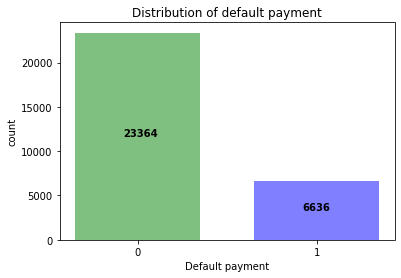

In [19]:
# access value counts
g_default = data.groupby('default').size().reset_index()
g_default.columns = ['default','count']
print(g_default)

# 
fig , ax = plt.subplots()
ax.bar(g_default['default'],g_default['count'],width=0.7,color=['g','b'],alpha=0.5)
ax.set_title('Distribution of default payment')
ax.set_xticks([0,1])
ax.set_xlabel('Default payment')
ax.set_ylabel('count')
for i, v in enumerate(g_default['count']):
    ax.text( i -.08,v/2, str(v), color='black', fontweight='bold')

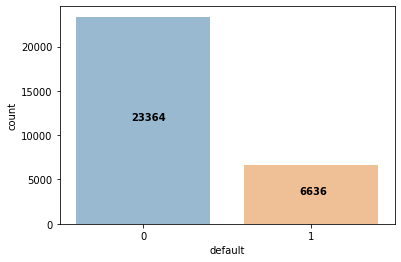

In [20]:
ax = sns.countplot(x='default',data=data,alpha=0.5)
for i, v in enumerate(g_default['count']):
    ax.text( i -.07,v/2, str(v), color='black', fontweight='bold')

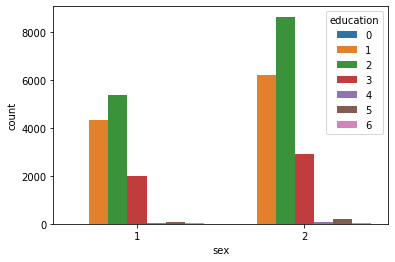

In [9]:
ax = sns.countplot(x='sex',hue='education',data=data)

<div class='alert alert-block alert-success' style='font-size:100%'>

### Task 1
1a - Produce a bar chart of each education level per "default" class.    
1b - Produce a bar chart of each marriage level per "default" class.

</div>

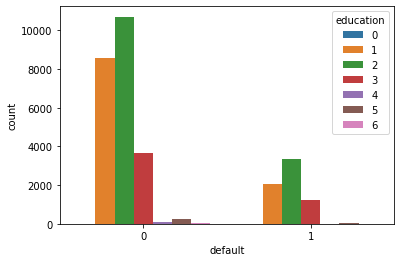

In [10]:
# please implement task 1 here

ax = sns.countplot(x='default',hue='education',data=data)


<div class='alert alert-block alert-success' style='font-size:120%'>
    
### Histogram

Similar to a bar chart, a histogram is an approximate representation of the distribution of numerical data. Study the following examples and complete task 2.

</div>

### Histogram of age with matplotlib and seaborn

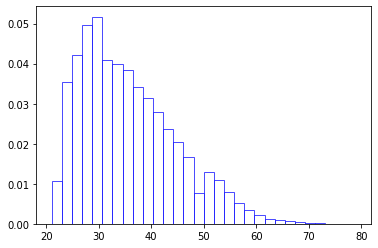

In [11]:
# Histogram of age with matplotlib

fig,ax = plt.subplots()
n, bins, patches = plt.hist(data['age'],bins=30,facecolor='w',edgecolor='b',alpha=0.7,density=1)

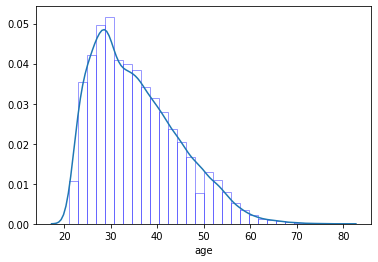

In [12]:
# Histogram of age with seaborn

sns.distplot(data['age'],bins=30,hist_kws={"edgecolor": 'b',"facecolor":'w'})

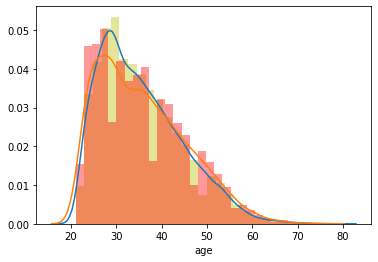

In [13]:
# Histogram of age for each class on same figure

fig,ax = plt.subplots()
sns.distplot(data[data['default']==0]['age'],bins=30,hist_kws={"facecolor":'y'})
sns.distplot(data[data['default']==1]['age'],bins=30,hist_kws={"facecolor":'r'})

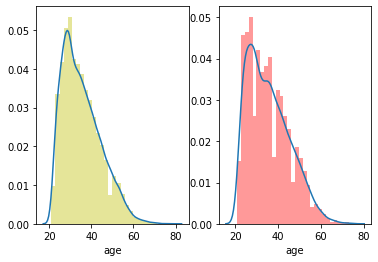

In [14]:
# Histogram of age for each class on separate axes

fig, axs = plt.subplots(nrows=1,ncols=2)
sns.distplot(data[data['default']==0]['age'],bins=30,hist_kws={"facecolor":'y'},ax=axs[0])
sns.distplot(data[data['default']==1]['age'],bins=30,hist_kws={"facecolor":'r'},ax=axs[1])

<div class='alert alert-block alert-success' style='font-size:120%'>
    
### Task 2
    
Plot a set of histograms, each one of them is a histogram of feature "pey_amt6" of a unique education class

Hint: There are 7 categorical levels for education -- use subplots of size (2,4).

</div>

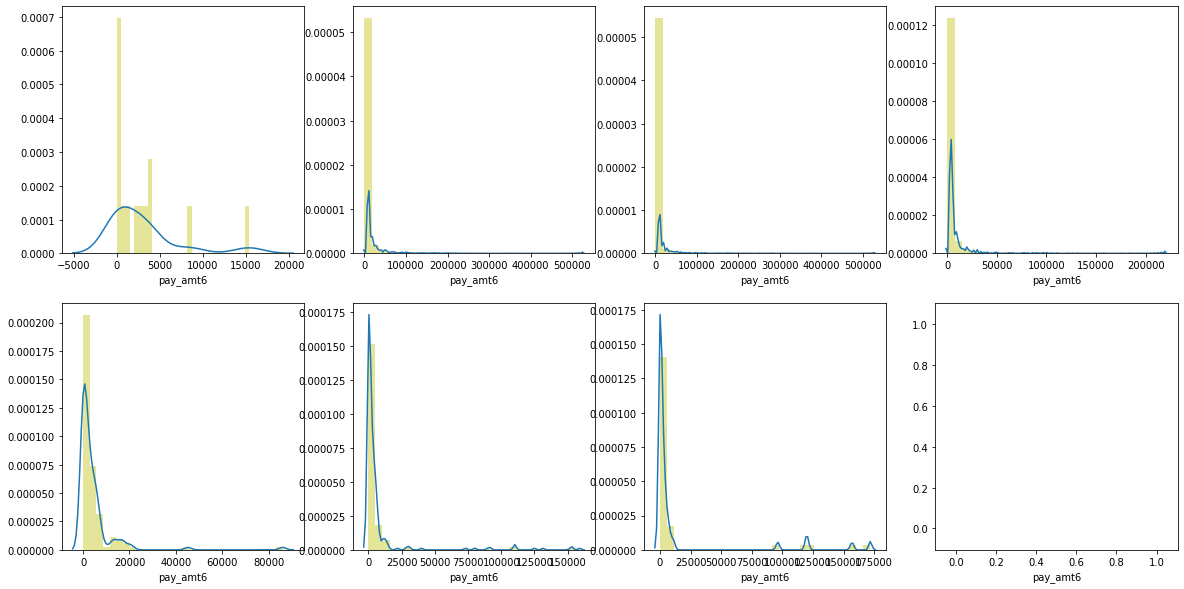

In [9]:
# please implement task 2 here


<div class='alert alert-block alert-success' style='font-size:120%'>
    
### Scatter Plot

A scatter plot displays values for typically two variables for a set of data, in Cartesian coordinates. Study the following examples and complete task 3.

</div>

### Scatter plot with matplotlib and seaborn

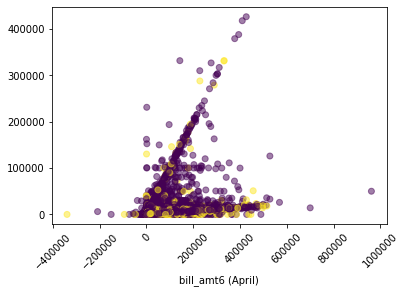

In [17]:
# Scatter plot of "bill_amt6" vs "pay_amt5 with Matplotlib

fig, ax = plt.subplots()
ax.scatter(data['bill_amt6'],data['pay_amt5'],c=data['default'],alpha=0.5)
ax.set_xlabel('bill_amt6 (April)')
ax.tick_params(axis='x',rotation=45)

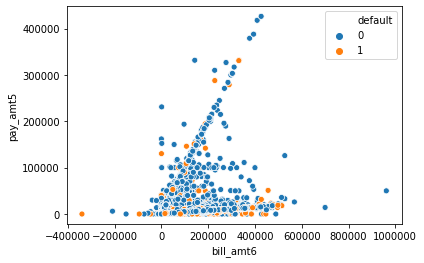

In [15]:
# Scatter plot of "bill_amt6" vs "pay_amt5 with Seaborn

sns.scatterplot(x='bill_amt6',y='pay_amt5',hue='default',data=data)

Text(0.5, 0, 'pay_amt5')

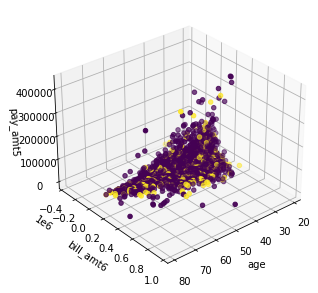

In [33]:
# 3D scatter plot
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111,projection='3d')
ax.scatter(data['age'],data['bill_amt6'],data['pay_amt5'],c=data['default'])
ax.view_init(30,50)
ax.set_xlabel('age')
ax.set_ylabel('bill_amt6')
ax.set_zlabel('pay_amt5')

<div class='alert alert-block alert-success' style='font-size:120%'>
    
### Task 3
    
Produce a set of scatter plots for variables "bill_amt" and "pay_amt" in each month.

</div>

In [ ]:
# please implement task 3 here



<div class='alert alert-block alert-success' style='font-size:120%'>
    
### Pair Plot
    
A pairplot visualize a pairwise relationships in a dataset.

</div>

In [23]:
bill_cols = [col for col in data.columns if 'bill' in col]

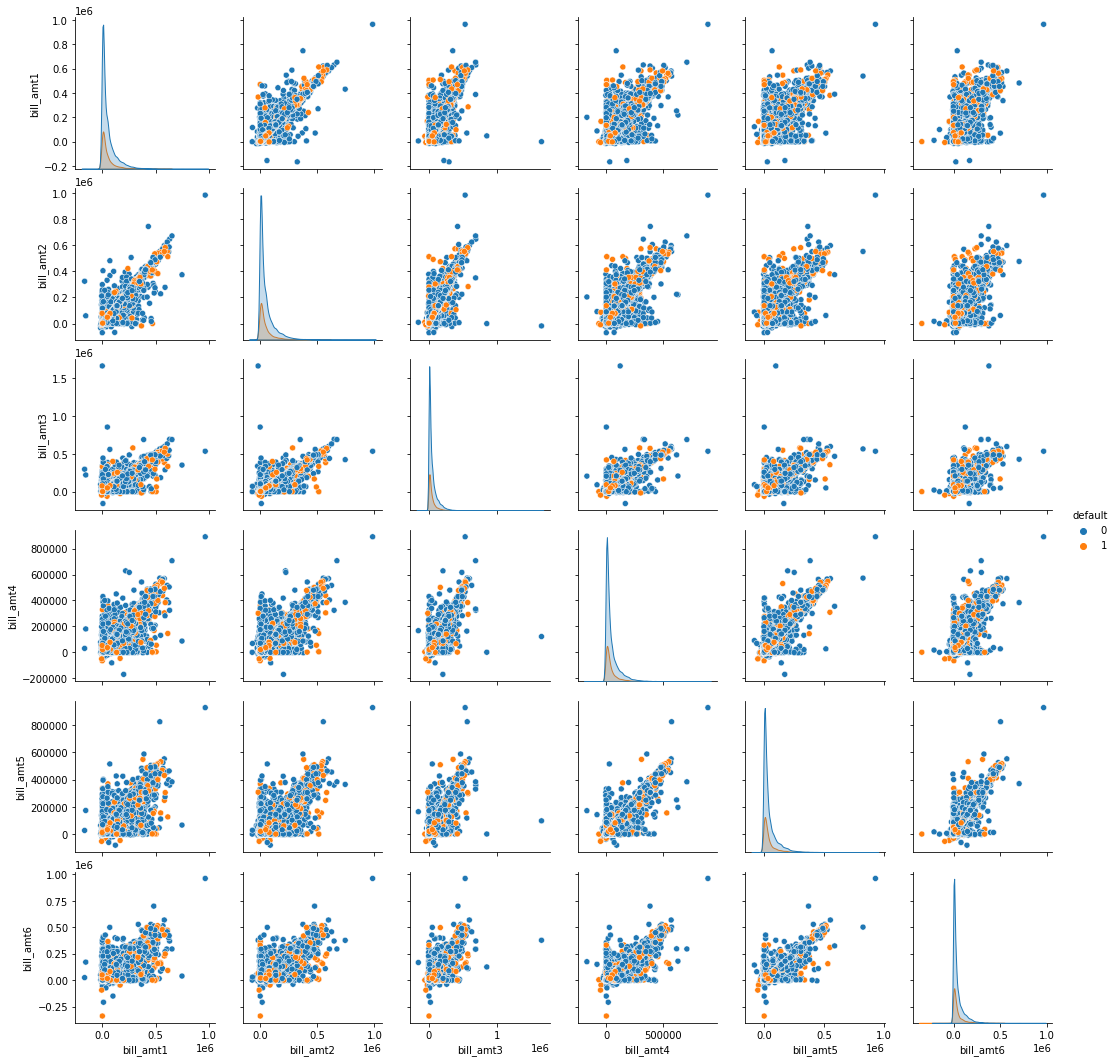

In [22]:
sns.pairplot(data[bill_cols+['default']],hue='default')

<div class='alert alert-block alert-success' style='font-size:120%'>
    
### Box plot
    
A box plot is used for graphically demonstrating descriptive statistics, including the locality, spread, and skewness groups of numerical data through their quartiles. Study the following examples and complete task 4.

</div>

Text(0.5, 1.0, 'Box plot for age feature')

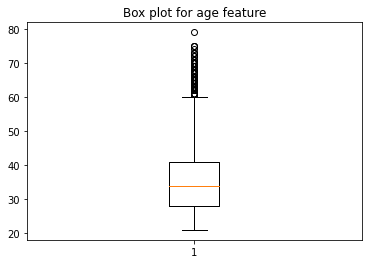

In [24]:
# Box plot of age feature

fig, ax = plt.subplots()
ax.boxplot(data['age'])
ax.set_title('Box plot for age feature')

Text(0.5, 1.0, 'Box plot for limit_bal feature')

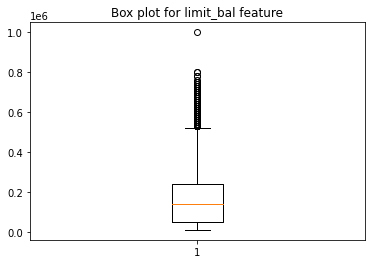

In [25]:
### Box plot of limit_bal feature

fig, ax = plt.subplots()
ax.boxplot(data['limit_bal'])
ax.set_title('Box plot for limit_bal feature')

### Grouped boxplot

<AxesSubplot:xlabel='education', ylabel='bill6_pay5'>

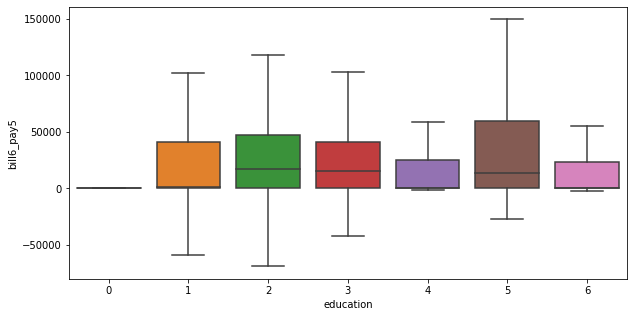

In [26]:
data['bill6_pay5'] = data['bill_amt6'] - data['pay_amt5']

fig,ax = plt.subplots(figsize=(10,5))
sns.boxplot(x='education',y='bill6_pay5',data=data,showfliers=False)

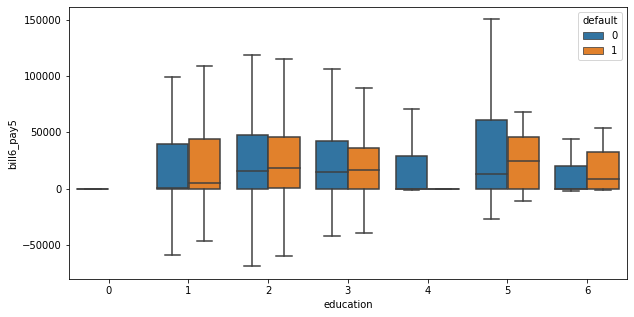

In [25]:
fig,ax = plt.subplots(figsize=(10,5))
sns.boxplot(x='education',y='bill6_pay5',data=data,showfliers=False,hue='default')

<div class='alert alert-block alert-success' style='font-size:120%'>
    
### Task 4
    
4a - Produce boxplot of "bill_amt" per "default" class, for all months.
    
4b - Produce boxplot of the difference between "bill_amt_n" and "pay_amt_$(n+1)" per "default" class, for n = 1, 2, and 3.

</div>

In [32]:
# please implement task 4 here




<div class='alert alert-block alert-success' style='font-size:120%'>

### Violin plot

A violin plot, similar to box plots, carries density information on each side.

</div>

<AxesSubplot:xlabel='age'>

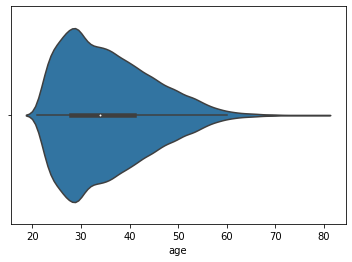

In [27]:
# Seaborn: Violinplot of 'age' feature

sns.violinplot(x='age',data=data)

(-100000.0, 300000.0)

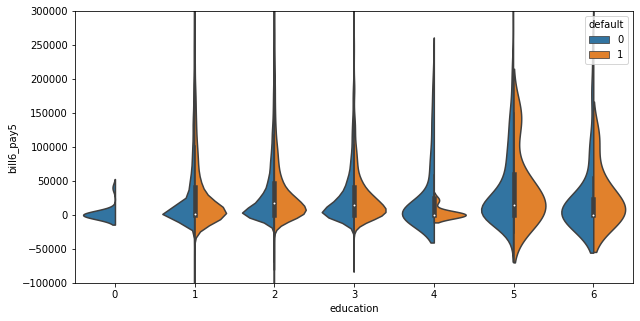

In [28]:
fig,ax = plt.subplots(figsize=(10,5))
sns.violinplot(x='education',y='bill6_pay5',data=data,scale='width',split=True,hue='default',showextrema=False)
ax.set_ylim(-100000,300000)